#  **TABLE OF CONTENTS**

---

## **1. Introduction**

## **2. Preparing and exploring the data**

> ###  2.1 Import librabries and handle missing values
> ###  2.2 Handle missing values

## **3. Visualization and Analysis**
> ### 3.1 Statistics and relationship analysis of importank features
> ### 3.2 Analysis based on Normal distribution and Group

## **4. Find the optimal number of clusters and perform clustering**

> ### 4.1 K-Means with Elbow method

> > #### 4.1.1 Preprocess and normalize
> > #### 4.1.2 Elbow method and cluster
> > #### 4.1.3 Visualization
> > #### 4.1.4 Cluster without normalization

> ### 4.2 K-Means for some features and Label encoding

> > #### 4.2.1 K-Means for some features
> > #### 4.2.2 K-means with Label Encoding

> ### 4.3 K-Prototype

> ### 4.4 Hiearchical clustering

> > #### 4.4.1 Dendrogram
> > #### 4.4.2 Agglomerative Clustering



---

## **1. Introduction**




*   Bib: runnning registration number (F is female).
*   Name: name of runner
*   **Age**: age
*   **M/F**: sex
*   **City**: city where runners live 
*   **State**: state where runner live 
*   **Country**: country where runner live
*   Citizen: nationality of the runner
*   5k: 5km of first half
*   10k:  10km of first half
*   20k:  20km of first half
*   Half: running time of half the distance
*   25k: 25km of second half
*   30k: 30km of second half
*   35k: 35km of second half
*   40k: 40km of second half
*   Pace : time per mile (min/mile)
*   **Official**: end time
*   **Overall**: rank 
*   Gender : rank by gender
*   Division: rank by age



---



## **2. Preparing and exploring the data**




### 2.1 Import librabries and handle missing value

> Connect Google Drive to Google Colab and import necessary librabries

> Load the data in file csv from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # Librabry for table data
import numpy as np # Librabry for algebra
from scipy import stats # Library for statistic
# Library for preprocess
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
# Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library for cluster
from sklearn.cluster import KMeans 
from kmodes.kprototypes import KPrototypes
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score 
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/marathon_results_2015.csv') # Load data from Google Drive
df.head() # See some information at the top of dataset

Bib                   Name  Age M/F  ... Official Time Overall Gender Division
0   3         Desisa, Lelisa   25   M  ...       2:09:17       1      1        1
1   4  Tsegay, Yemane Adhane   30   M  ...       2:09:48       2      2        2
2   8         Chebet, Wilson   29   M  ...       2:10:22       3      3        3
3  11       Kipyego, Bernard   28   M  ...       2:10:47       4      4        4
4  10          Korir, Wesley   32   M  ...       2:10:49       5      5        5

[5 rows x 22 columns]

### 2.2 Handle missing values


In [ ]:
df.shape # Size of data

(26597, 22)

In [ ]:
df.info() # Information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26597 entries, 0 to 26596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bib            26597 non-null  object
 1   Name           26597 non-null  object
 2   Age            26597 non-null  int64 
 3   M/F            26597 non-null  object
 4   City           26597 non-null  object
 5   State          24046 non-null  object
 6   Country        26597 non-null  object
 7   Citizen        1064 non-null   object
 8   5K             26597 non-null  object
 9   10K            26597 non-null  object
 10  15K            26597 non-null  object
 11  20K            26597 non-null  object
 12  Half           26597 non-null  object
 13  25K            26597 non-null  object
 14  30K            26597 non-null  object
 15  35K            26597 non-null  object
 16  40K            26597 non-null  object
 17  Pace           26597 non-null  object
 18  Official Time  26597 non-n

In [ ]:
df1 = df.drop(columns=['Citizen', 'Name', 'Bib']) # Drop unnecessary features
df1.drop(df1[df1.State.isnull()].index, inplace=True) # Drop all NaN rows of State Columns
list_miss = ['5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Half', 'Official Time', 'Pace'] # List all K time columns
# Remove all NaN rows of each elements in list_miss
for i in list_miss:
    df1 = df1.drop(df1[df1[i] == '-'].index, axis = 0)
# Type casted to Float and covert to minutes 
list_Object2Float = ['5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Half', 'Official Time', 'Pace']
for i in list_Object2Float:
    df1[i] = df1[i].str.split(':').apply(lambda x: int(x[0])*60 + int(x[1]) + int(x[2])/60)

In [ ]:
df1.describe() # Descriptive statistic

Age            5K  ...        Gender      Division
count  23785.000000  23785.000000  ...  23785.000000  23785.000000
mean      41.757831     25.594932  ...   6642.417364   1683.179567
std       11.350313      4.020250  ...   3912.840294   1495.020524
min       18.000000     14.733333  ...      4.000000      1.000000
25%       33.000000     22.716667  ...   3295.000000    530.000000
50%       42.000000     25.016667  ...   6564.000000   1217.000000
75%       50.000000     27.633333  ...   9867.000000   2353.000000
max       82.000000     53.050000  ...  14581.000000   6003.000000

[8 rows x 15 columns]

> We see that the number of participants is 23785 but the rank is up to 26598. There are 2812 residual ranks.

> This is **impossible**. Because we have removed some rows, it causes some rank loss. But we need a real rank, so we **will not reset the rank**.


In [ ]:
df1.isnull().sum() # Check missing values again

Age              0
M/F              0
City             0
State            0
Country          0
5K               0
10K              0
15K              0
20K              0
Half             0
25K              0
30K              0
35K              0
40K              0
Pace             0
Official Time    0
Overall          0
Gender           0
Division         0
dtype: int64

---
## **3. Visualization and Analysis**




### 3.1 Statistics and relationship analysis of important features

> Analysis based on Age

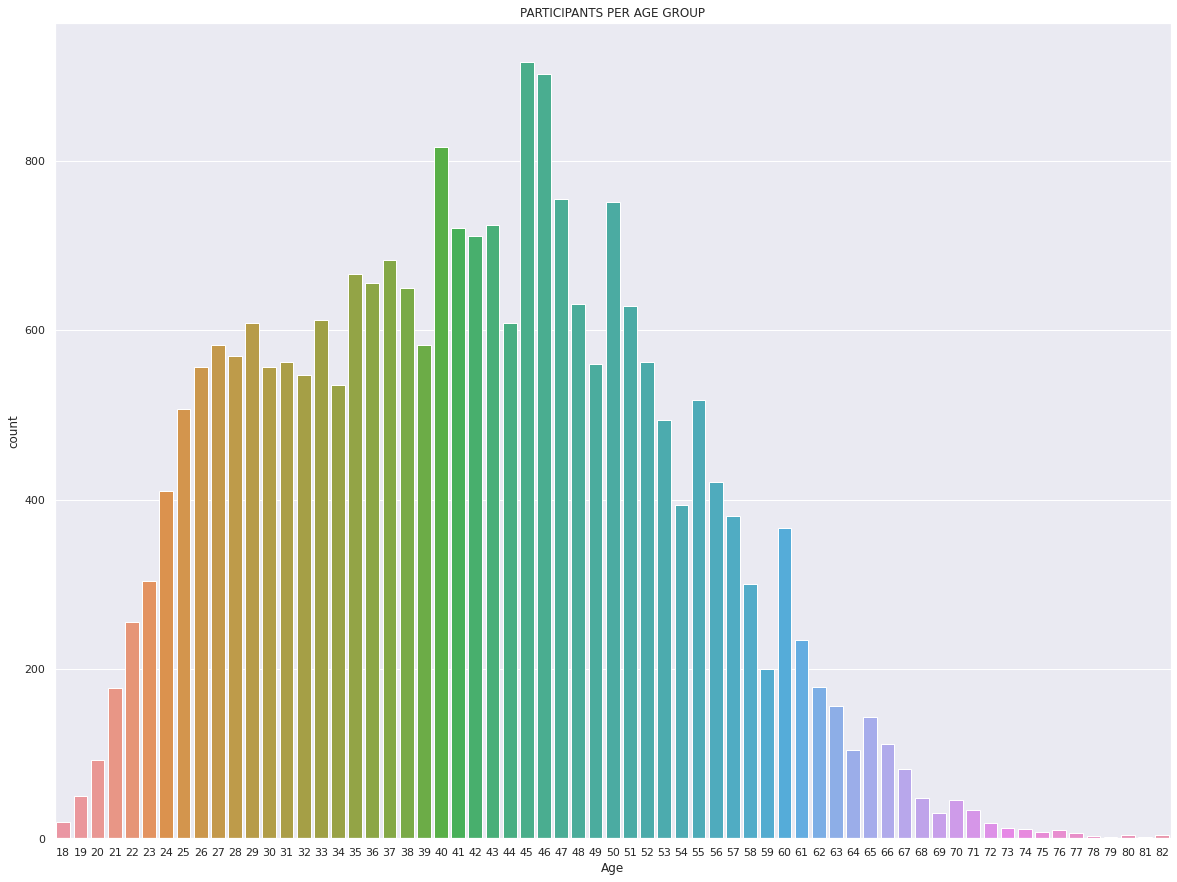

In [ ]:
sns.set_theme(style="darkgrid", palette="deep") # Set theme for graph
age_plot = sns.countplot('Age', data=df1) # Plot countplot
age_plot.figure.set_size_inches(20,15) # Set size of plot
age_plot.set_title("PARTICIPANTS PER AGE GROUP") # Set title of plot

> **Conclusion:** Based on descriptive statistics and graph above, we see:
1. The **average** age of running is 42 years old.
2. The **most** active age for running is 45 and 46 years old.
3. The number of runners is **concentrated** betwtween the ages of **38 and 51 years old ( > 600)** except 39 and 49 years old.
4. **Very few people** over **60** years old and under **23** years old participate in running.

> Analysis based on Age and Sex

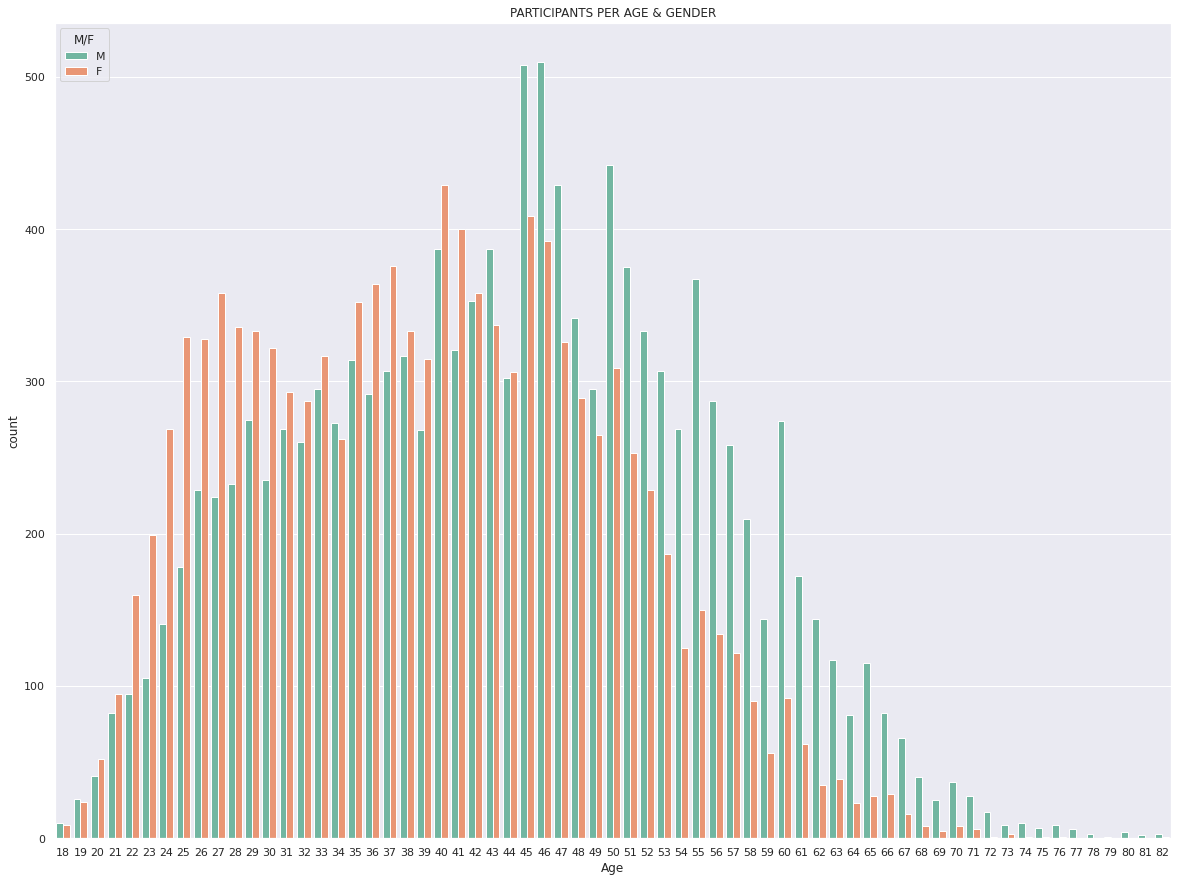

In [ ]:
sns.set_theme(style="darkgrid", palette="Set2") # Set theme for graph
age_gd_plot = sns.countplot('Age', data=df1, hue='M/F') # Plot countplot
age_gd_plot.figure.set_size_inches(20,15) # Set size of plot
age_gd_plot.set_title("PARTICIPANTS PER AGE & GENDER") # Set title of plot

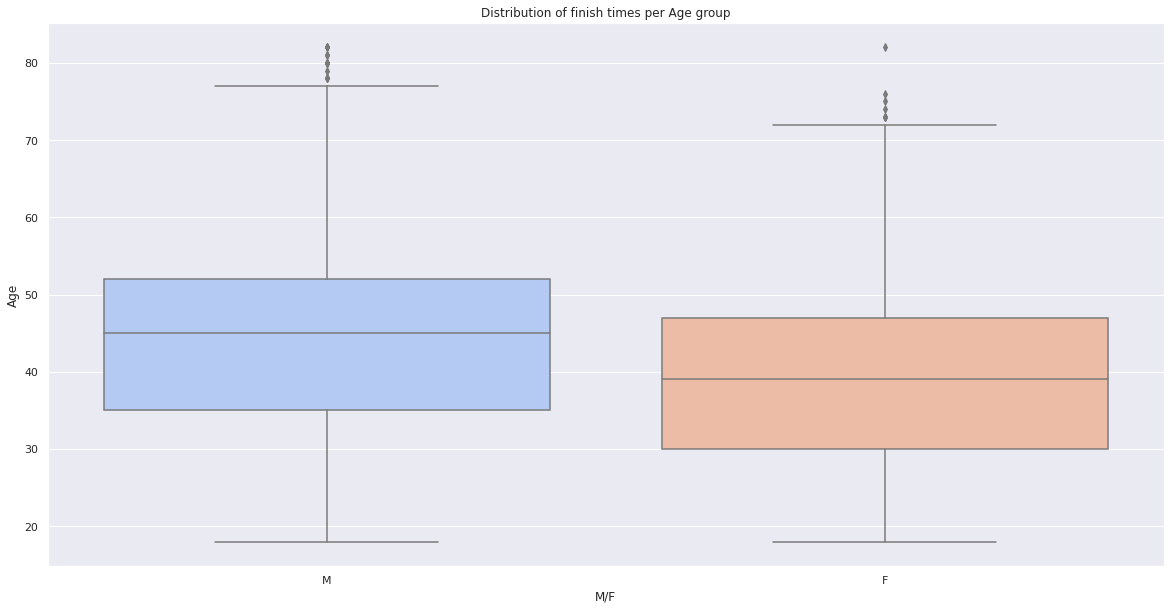

In [ ]:
age_gd_plot_1 = sns.boxplot(df1['M/F'], df1['Age'], palette="coolwarm") # Plot boxplot
age_gd_plot_1.figure.set_size_inches(20,10) # Set size of plot
age_gd_plot_1.set_title("Distribution of finish times per Age group") # Set title of plot

In [ ]:
df1['M/F'].value_counts().unique # Calculate the number of M and F 

<bound method Series.unique of M    12547
F    11238
Name: M/F, dtype: int64>

> **Conclusion:** Based on results and two graphs above, we see:
1. **Men** run more **than women** (1309 people).
2. The number of **female** participants is **higher** than that of **males** in the age group of** 20 to 42** and 44 years olds.
3. The number of **male** participants is **higher** than that of **female** in the age group of **45 to 82** years old. 

> Analysis based on Age, Sex and Official Time

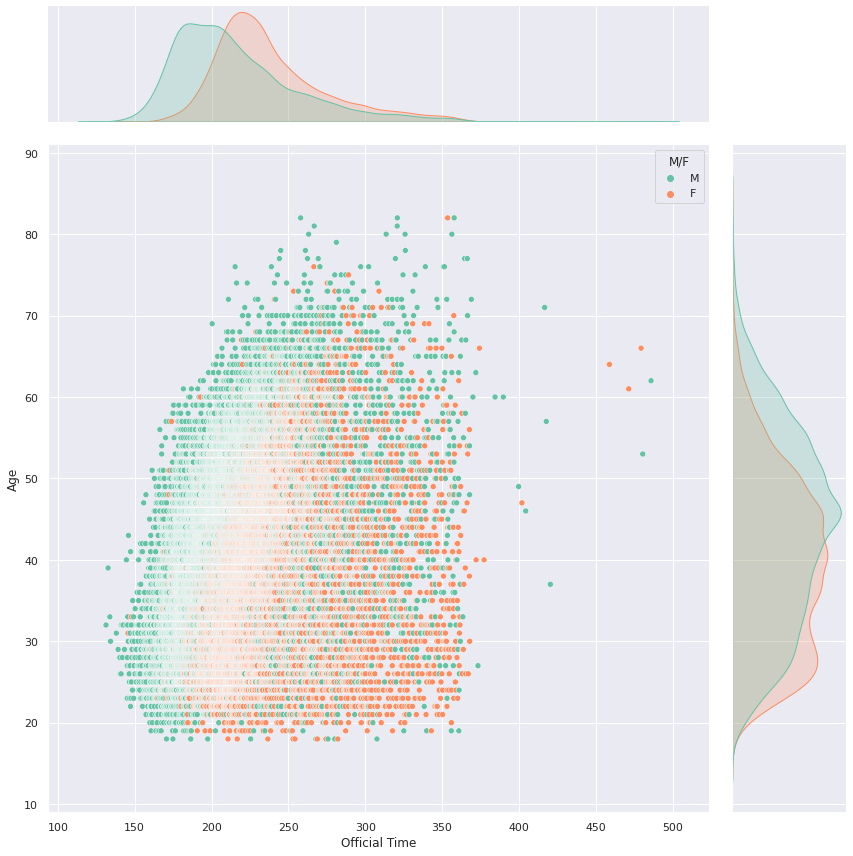

In [ ]:
official_time_plot = sns.jointplot(x=df1['Official Time'], y=df1['Age'], hue=df1['M/F'], size=12) # Plot Official time according to Age and Sex

> **Conclusion:** Based on graph above, we see:
1. **Men's running time** is highly concentrated from **160 to 200 minutes**.
2. **Women's running time** is highly concentrated from **220 to 250 minutes**.
3. **Men's running age** is around **46** years old while women's is more evenly spread between** 27 and 50** years old. 

> Analysis based on Age, Sex and Overall

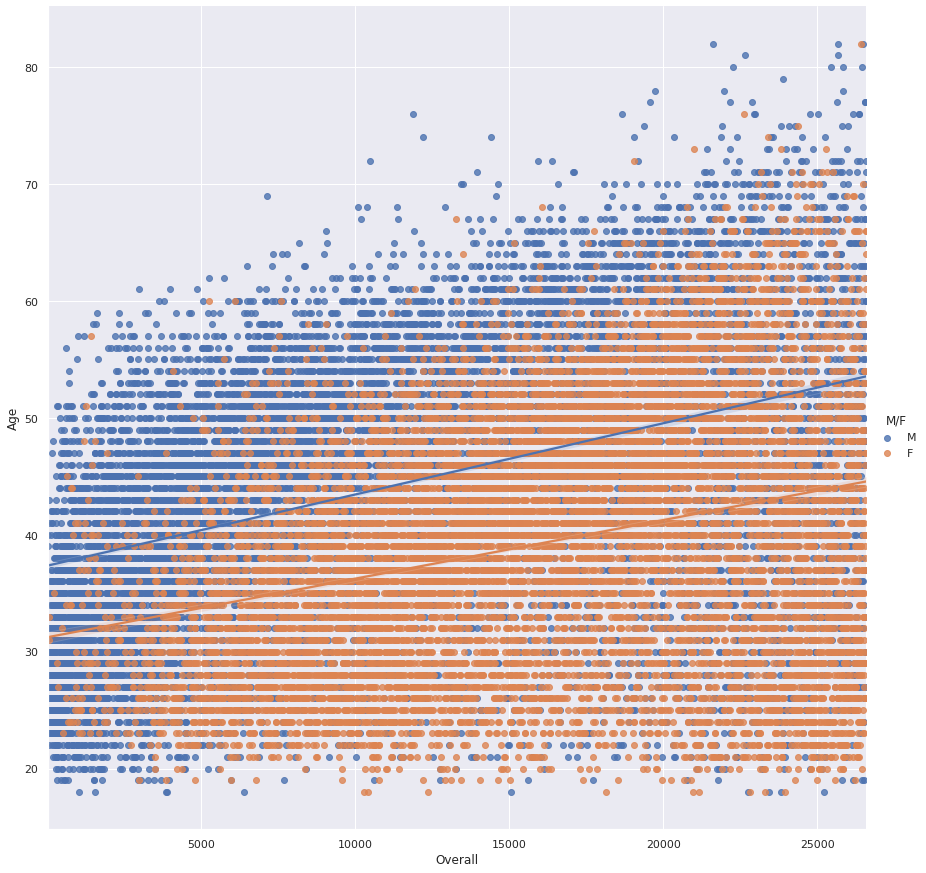

In [ ]:
overall_plot = sns.lmplot(x='Overall', y='Age', data = df1, hue='M/F', palette="deep", size=12) # Plot overall according to Age and Sex

> **Conclusion:** Based on graph above, we see:
1. Between **30 and 55** years old, **rank increases with ag**e.
2. **Men's** average **rank** is h**igher than women's**.

> Because the **USA** is the country with the **most participants**, more than **10 times** more **than the 2nd country**, so consider the participation of 10 other countries.

> Analysis based on Country

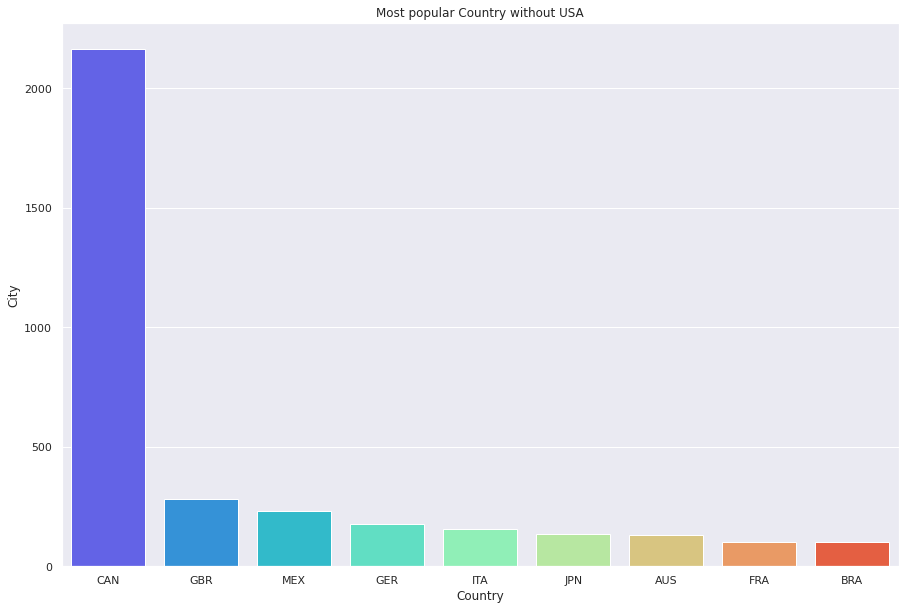

In [ ]:
Country_City = df.groupby('Country').count()['City'].sort_values(ascending=False).head(10)[1:] # Mean of City according to Country
country_plot = sns.barplot(Country_City.index, Country_City, palette='rainbow') # Plot country according to City
country_plot.figure.set_size_inches(15,10) # Set size for plot
country_plot.set_title("Most popular Country without USA") # Set title for plot

> **Conclusion:** Based on graph above, we see (wiout USA):
1. **Canada** is the country with the **most runner** (more than 2000 people).
2. **Other countries** have a small number of participants (less **400** people).

> Analysis based on City

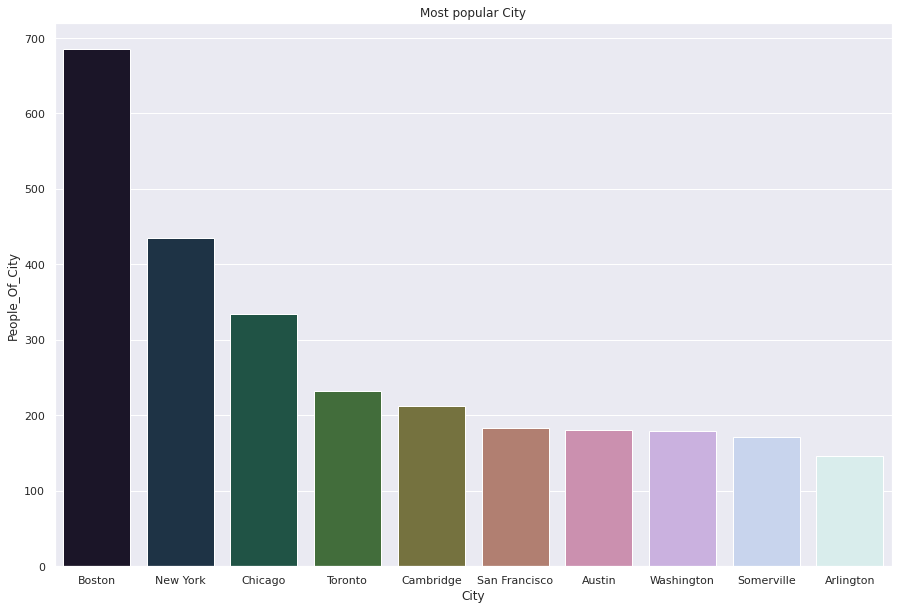

In [ ]:
df['People_Of_City'] = df['Country'] # Create new column
City_Country = df.groupby('City').count()['People_Of_City'].sort_values(ascending=False).head(10) # Group number Country according to City
City_plot = sns.barplot(City_Country.index, City_Country, palette='cubehelix') # Plot barplot
City_plot.figure.set_size_inches(15,10) # Set size for figure
City_plot.set_title("Most popular City") # Set title for figure

> **Conclusion:** Based on graph above, we see:
1. **Boston** is the city with the **most runner** (appoximately 686 people).
2. **Other cities** have less than **450** participants.

> Analysis based on State

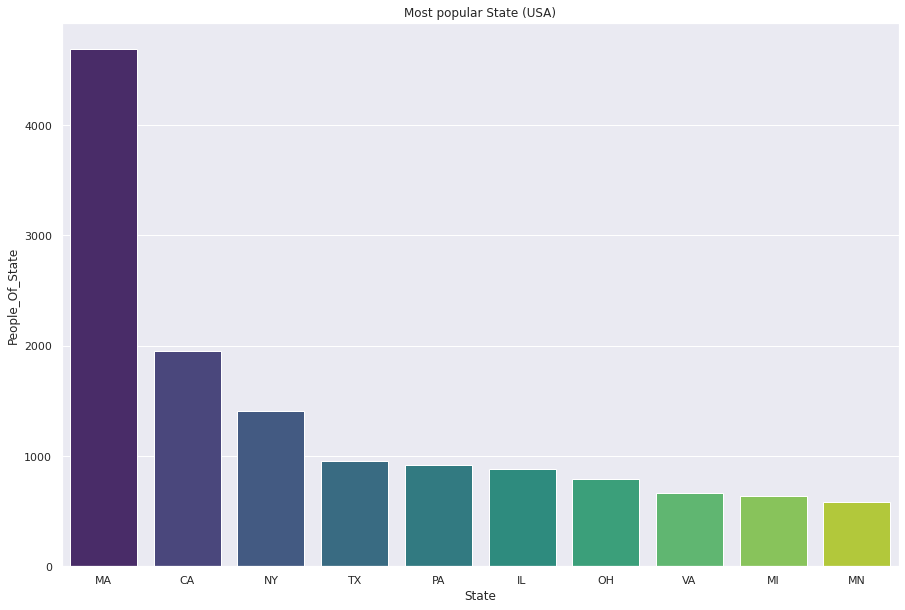

In [ ]:
df['People_Of_State'] = df['Country'] # Create new column
State_country = df[df['People_Of_State'] == 'USA'].groupby('State').count()['People_Of_State'].sort_values(ascending=False).head(10) # Group number Country according to State
State_plot = sns.barplot(State_country.index, State_country, palette="viridis") # Plot barplot
State_plot.figure.set_size_inches(15,10) # Set size for figure
State_plot.set_title("Most popular State (USA)") # Set title for figure

> **Conclusion:** Based on graph above, we see:
1. **Massachusetts** is the state with the **most runner** (appoximately 4500 people).
2. **Other cities** have less than **2000** participants.

### 3.2 Analysis based on Normal distribution and Group

> Analysis based on Normal distribution graph

In [ ]:
df1['Pace'] = df1['Pace'].apply(pd.to_numeric, errors = 'coerce') # Convert Pace from object to float

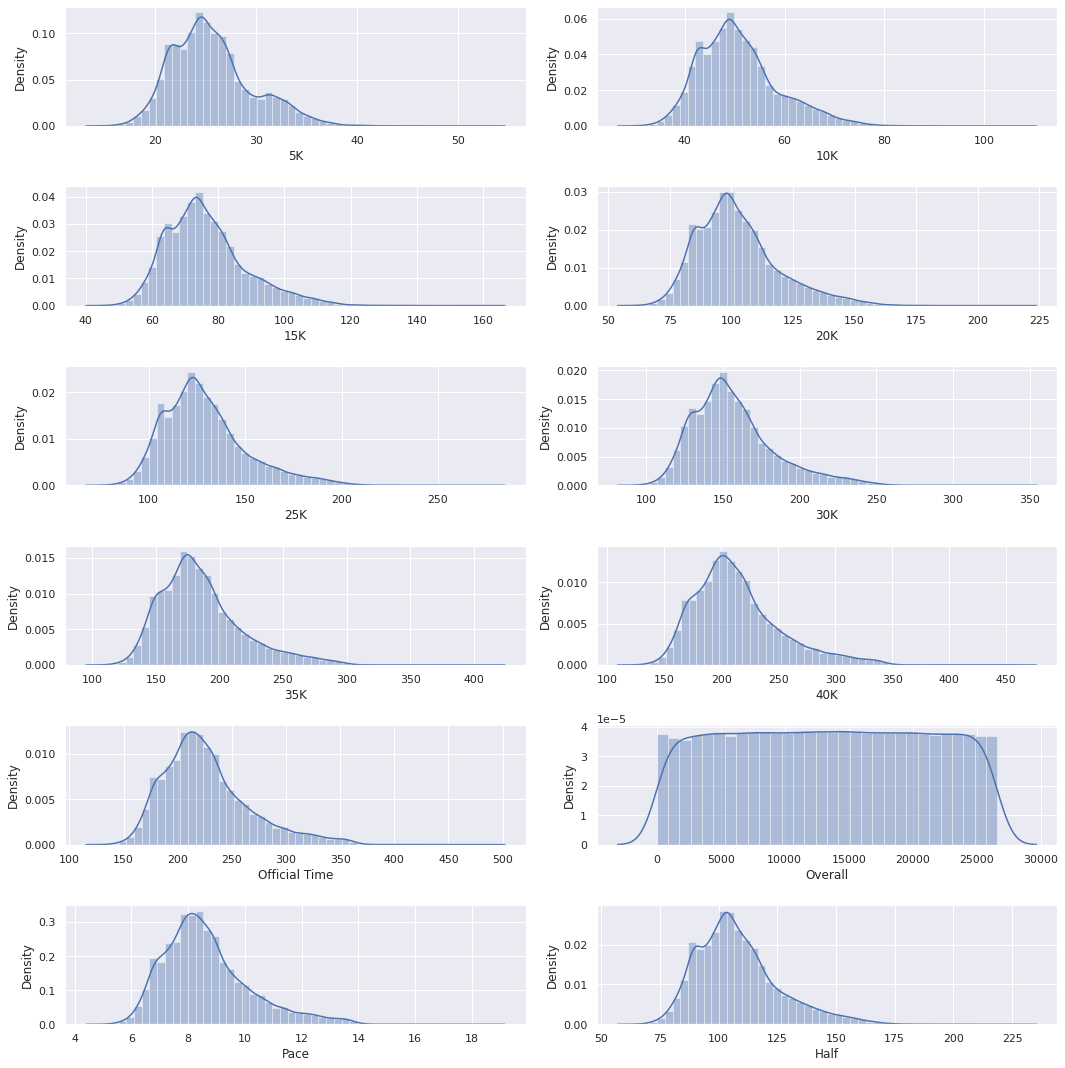

In [ ]:
list_feature_number=['5K','10K','15K','20K','25K','30K','35K','40K','Official Time','Overall','Pace','Half','Division'] # List necessary features
fig,ax = plt.subplots(6,2, figsize=(15,15)) # Create new figure
i=0 
for x in range(6):
    for y in range(2):
        sns.distplot(df1[list_feature_number[i]], ax = ax[x,y]) # Plot distribution graph on subplot
        i+=1
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show() # Plot all

> **Conclusion:** Based on graph above, we see:
1. **All distributions don't **abide by a **normal distribution**.
2. **Most of the distribution graph** are **skewed** to the left of **Mean**.


> Analysis based on group of age

In [ ]:
def cluster_age(x): # Function to divide the ages into three groups
  if x >= 18 and x <= 25:
    return 0
  else:
    return 1 if x >= 26 and x <= 50 else 2
df1['new_Age'] = df1['Age'].apply(cluster_age) # Apply above function for Age column

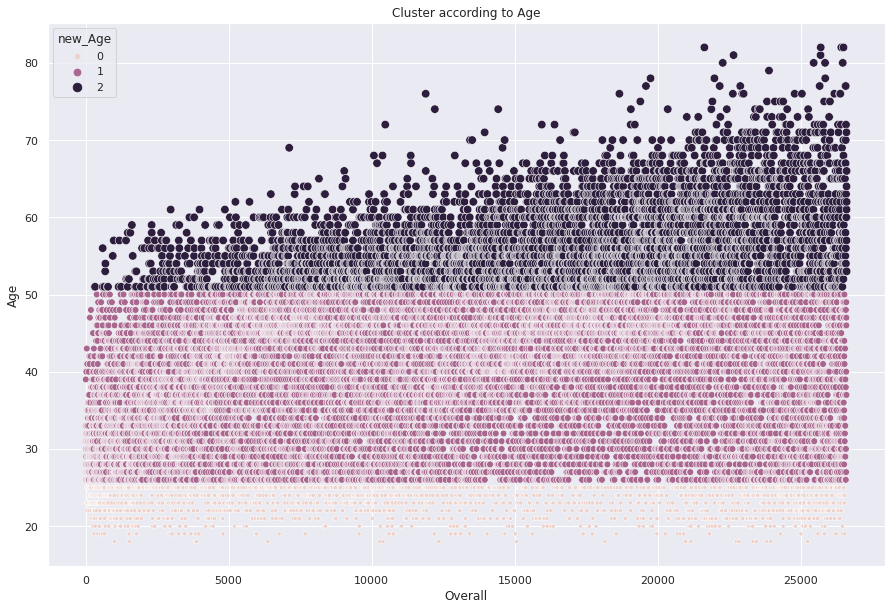

In [ ]:
cluster_plot = sns.scatterplot(data=df1, x="Overall", y="Age", hue="new_Age", size="new_Age") # Plot scatter
cluster_plot.figure.set_size_inches(15,10) # Set size for figure
cluster_plot.set_title("Cluster according to Age") # Set title for plot

> **Conclusion:** Based on graph above, we see: 
1. The number of participants is **concentrated** mainly in the age group of **30 to 50** years old.
2. There are many **people** who are over **70** years old but have very **good rankings**.



---
## **4. Find the optimal number of clusters and perform clustering**


### 4.1 K-Means with Elbow method



#### 4.1.1 Preprocess and normalize

In [ ]:
df2 = df1.drop(columns=['City']) # Drop City column
df3 = pd.get_dummies(df2) # Convert object type to int by one hot encoding
df3.head(7) # Show 7 first info

Age         5K        10K  ...  State_YT  Country_CAN  Country_USA
6    32  14.750000  29.750000  ...         0            0            1
7    39  14.733333  29.733333  ...         0            0            1
10   33  14.766667  29.833333  ...         0            0            1
11   30  15.233333  30.566667  ...         0            0            1
13   31  14.733333  29.733333  ...         0            0            1
15   29  16.133333  32.316667  ...         0            0            1
17   28  15.950000  32.350000  ...         0            0            1

[7 rows x 89 columns]

In [ ]:
df4 = normalize(df3, norm='l2') # Normalization for dataset


#### 4.1.2 Elbow method and cluster

In [ ]:
WCSS = [] # Within Cluster Sum of Squares
for i in range(1, 15):
    K_Means = KMeans(n_clusters=i, init = 'k-means++', random_state = 1) # Apply Kmeans
    K_Means.fit(df4) # Fit model
    # WCSS of model
    WCSS.append(K_Means.inertia_)

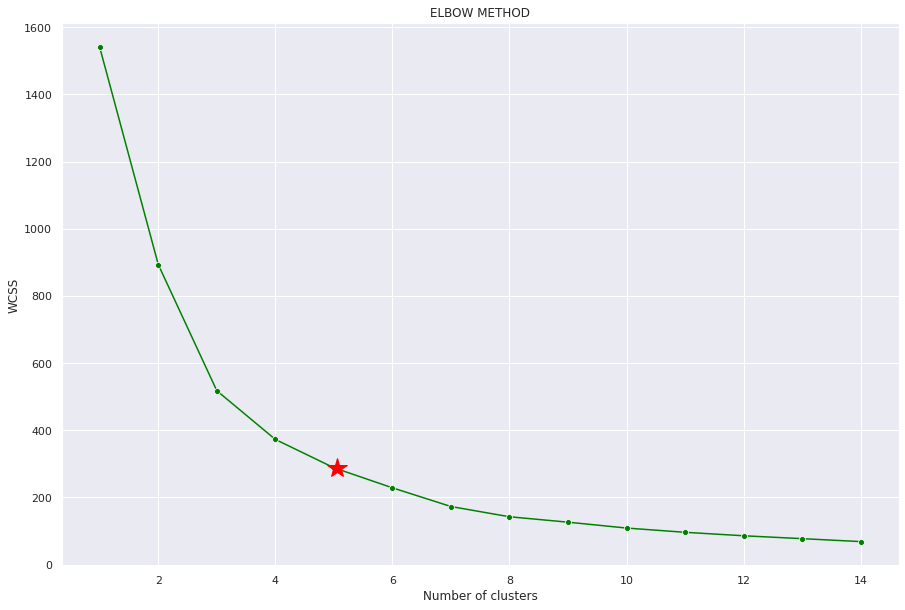

In [ ]:
plt.figure(figsize=(15,10)) # Create new figure
sns.lineplot(range(1, 15), WCSS, marker='o', color='green') # Draw line
plt.plot(5.05, 289, marker='*', markersize=20, color='red') # Draw marker
plt.title('ELBOW METHOD') # Set title for figure
plt.xlabel('Number of clusters') # Set label for x axis
plt.ylabel('WCSS') # Set label for y axis
plt.show() # Plot akk

> **Conclusion:** Based on graph above, we see: 
1. **Values 6 to 14** for WCSS results **don't decrease much**.
2. We **choose** the number of **clusters to be 5**.


In [ ]:
# Fitting K-Means to the dataset
K_Means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1)
y_kmeans = K_Means.fit_predict(df4) # Fit model


#### 4.1.3 Visualization

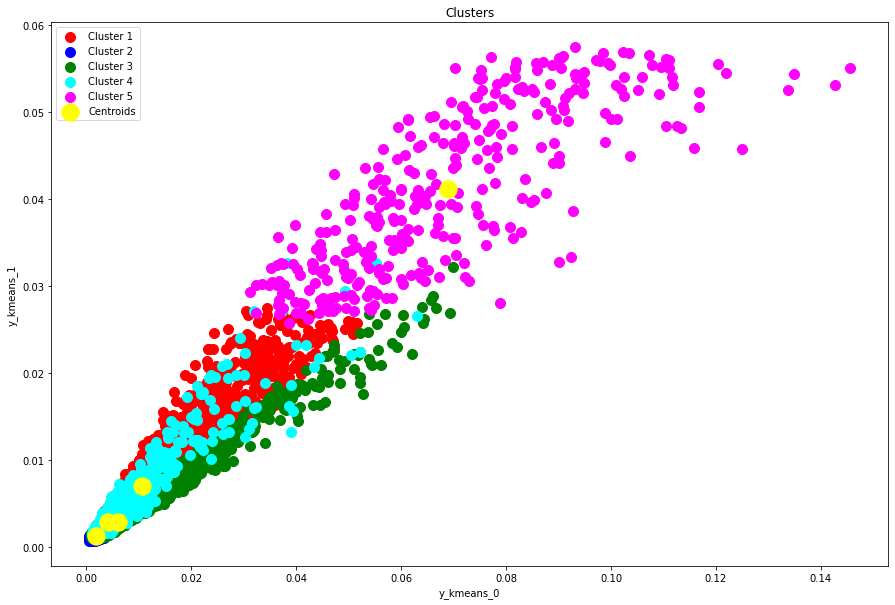

In [ ]:
# Visualizing all the clusters 
plt.figure(figsize=(15,10)) # Create new figure
plt.scatter(df4[y_kmeans == 0, 0], df4[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') # Draw cluster 1
plt.scatter(df4[y_kmeans == 1, 0], df4[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') # Draw cluster 2
plt.scatter(df4[y_kmeans == 2, 0], df4[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') # Draw cluster 3
plt.scatter(df4[y_kmeans == 3, 0], df4[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') # Draw cluster 4
plt.scatter(df4[y_kmeans == 4, 0], df4[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') # Draw cluster 5
plt.scatter(K_Means.cluster_centers_[:, 0], K_Means.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') # Draw centroids
plt.title('Clusters') # Set label for y axis
plt.xlabel('y_kmeans_0') # Set title for figure
plt.ylabel('y_kmeans_1') # Set label for y axis
plt.legend() # Plot legend
plt.show() # Plot all

> **Conclusion:** Based on graph above, we see: 
1. **Centroids** are **close** together, clusters are **overlapping**.
2. **Clustering** process is not very good when using Normalization.



#### 4.1.4 Visualization

> Silhouette score

In [ ]:
# Calculate the average of silhouette scores
silhouette_avg = silhouette_score(df4, y_kmeans) # Average score
each_silhouette_score = silhouette_samples(df4, y_kmeans, metric="euclidean") # Apply Silhouette with Euclid metric
print(silhouette_avg) # Show score

0.43235502342798127


> Visualization

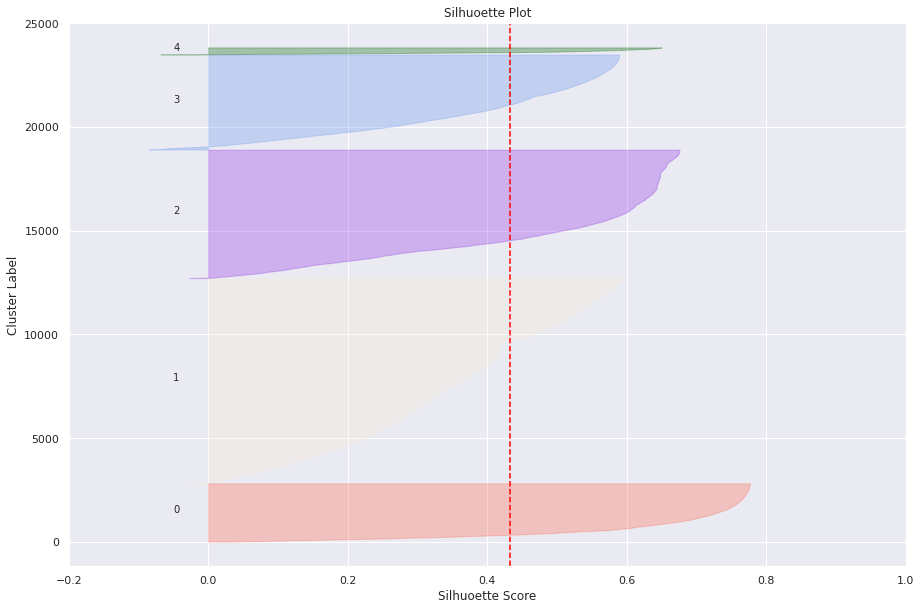

In [ ]:
fig = plt.figure() # Create new figure
ax = fig.add_subplot(1,1,1) # Add subplot
y_lower = 10
n_clusters = 5 # 5 centroids
colorlist = ["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]

for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[y_kmeans == i] # Score of each cluster
    ith_cluster_silhouette_values.sort() # Sort value
    size_cluster_i = ith_cluster_silhouette_values.shape[0] # Size of cluster
    y_upper = y_lower + size_cluster_i # Set disctance of y axis to visualize 5 clusters
    color = colorlist[i] # Set color
    # Fill color
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)   
    # Label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))   
    # Compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette Plot") # Set title for figure
ax.set_xlabel("Silhuoette Score") # Set label for x axis
ax.set_ylabel("Cluster Label") # Set label for y axis
ax.figure.set_size_inches(15,10) 
# The vertical line for average Silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--") 
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1]) # Set ticks for x axis

> **Conclusion:** Based on graph above, we see: 
1. **Cluster_0** has the **highest score**.
2. **Cluster_1** has the **lowest score**.



#### 4.1.4 Cluster without normalization

In [ ]:
df3_No_Norm = df3.to_numpy() # Convert dataframe to array
# Fitting K-Means to the dataset
K_Means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1) # Apply KMeans
y_kmeans = K_Means.fit_predict(df3_No_Norm) # Fit model

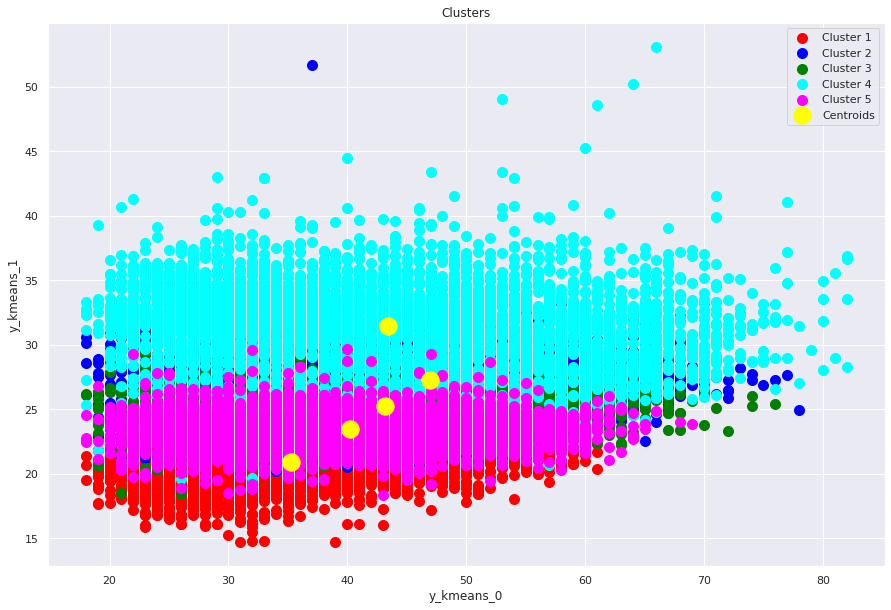

In [ ]:
# Visualizing all the clusters without Normalization
plt.figure(figsize=(15,10)) # Create new figure
plt.scatter(df3_No_Norm[y_kmeans == 0, 0], df3_No_Norm[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') # Draw cluster 1
plt.scatter(df3_No_Norm[y_kmeans == 1, 0], df3_No_Norm[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') # Draw cluster 2
plt.scatter(df3_No_Norm[y_kmeans == 2, 0], df3_No_Norm[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') # Draw cluster 3
plt.scatter(df3_No_Norm[y_kmeans == 3, 0], df3_No_Norm[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') # Draw cluster 4
plt.scatter(df3_No_Norm[y_kmeans == 4, 0], df3_No_Norm[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') # Draw cluster 5
plt.scatter(K_Means.cluster_centers_[:, 0], K_Means.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') # Draw centroids
plt.title('Clusters') # Set label for y axis
plt.xlabel('y_kmeans_0') # Set title for figure
plt.ylabel('y_kmeans_1') # Set label for y axis
plt.legend() # Plot legend
plt.show() # Plot all

> **Conclusion:** Based on graph above, we see: 
1. **Centroids** are **clearly separate**.
2. **Clustering** process is better without Normalization.


### 4.2 K-Means for some features and Label encoding



#### 4.2.1 K-means for some features

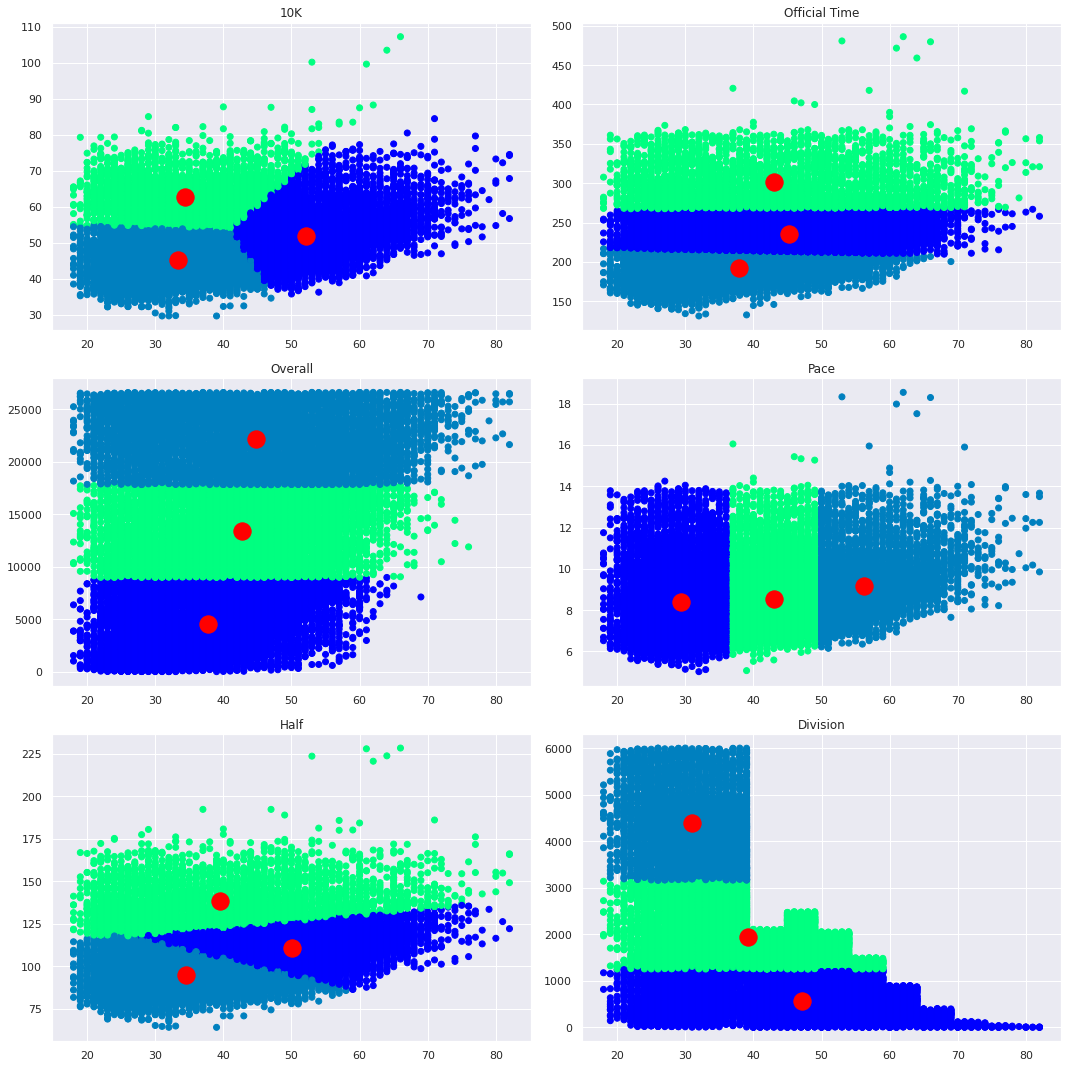

In [ ]:
list_feature_to_cluster = ['10K','Official Time','Overall','Pace','Half','Division'] # List necessary features for cluster
fig,ax = plt.subplots(3,2, figsize=(15,15)) # Create figure with a matrix 3*2 to draw plots
i = 0 
for x in range(3):
    for y in range(2):
        K_Means = KMeans(n_clusters=3,init = 'k-means++', random_state = 1)
        y_Kmeans = K_Means.fit_predict(df3[['Age',list_feature_to_cluster[i]]])
        # Plot scatter for Age column and each column in list_feature_to_cluster
        ax[x,y].scatter(df3['Age'],df3[list_feature_to_cluster[i]], c=y_Kmeans, cmap=plt.cm.winter) 
        ax[x,y].scatter(K_Means.cluster_centers_[:, 0], K_Means.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids') # Draw centroids
        ax[x,y].set_title(list_feature_to_cluster[i]) # Set title for each plot
        i+=1 
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show() # Plot all

> **Conclusion:** Based on graph above, we see: 
1. **Centroids** are **clearly separate**.
2. Some **clustering by Age** (**Official Time, Overall, Division**)
3. **Pace** and Age are **clusterd** along the **x axis**.
4. The **others** are **clustered** quite **well**.


#### 4.2.2 K-means with Label Encoding

In [ ]:
LE = LabelEncoder() # Encode label
df5 = df1.drop(columns=['Age']) # Drop Age column
df5 = pd.get_dummies(df5) # Convert object to categorical
y = df5 ['new_Age'] # Assign target column to y
df5['new_Age'] = LE.fit_transform(df5 ['new_Age']) # Fit LabelEnconde for data
y = LE.transform(y) # Fit LabelEncode for target column

In [ ]:
df5 = normalize(df5, norm='l2') # Normalization for dataset

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1) # Apply KMeans with 3 centroids
kmeans.fit(df5) # Fit model

In [ ]:
labels = kmeans.labels_ # Label of each point
# Check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size)) # Result of prediction
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size))) # Accuracy

Result: 7531 out of 23785 samples were correctly labeled.
Accuracy score: 0.32


### 4.3 K-Prototype 


In [ ]:
df6 = df2.drop(columns=['new_Age']) # Drop new_Age column

In [ ]:
X_Num = df6.drop(columns=["M/F","State","Country"]) # Numerical features
X_Cat = df6.drop(columns=["Division","Age","Official Time","Gender"]) # Categorical features

In [ ]:
# Running K-Prototype clustering, 3:centroids, Huang:method, 20:max iteration of k-modes algo for a single run
# n_jobns = 2 : all CPUs are used, gamma : weighing factor relative importance of numerical vs categorical attribute
kproto = KPrototypes(n_clusters=3, init='Huang', verbose=0, random_state=1, max_iter=20, n_init=50, n_jobs=-2, gamma=.25) 
y_kprototypes = kproto.fit_predict(df6, categorical=[1,2,3]) # Fit model

In [ ]:
labels = kproto.labels_ # Label of each point
silScoreKmeans = silhouette_score(X_Num, labels, metric="euclidean") # Apply Silhouette with Euclid metric
print("Silhouette Score with number : ", silScoreKmeans) # Silhouette Score

Silhouette Score with number :  0.47619051038535926


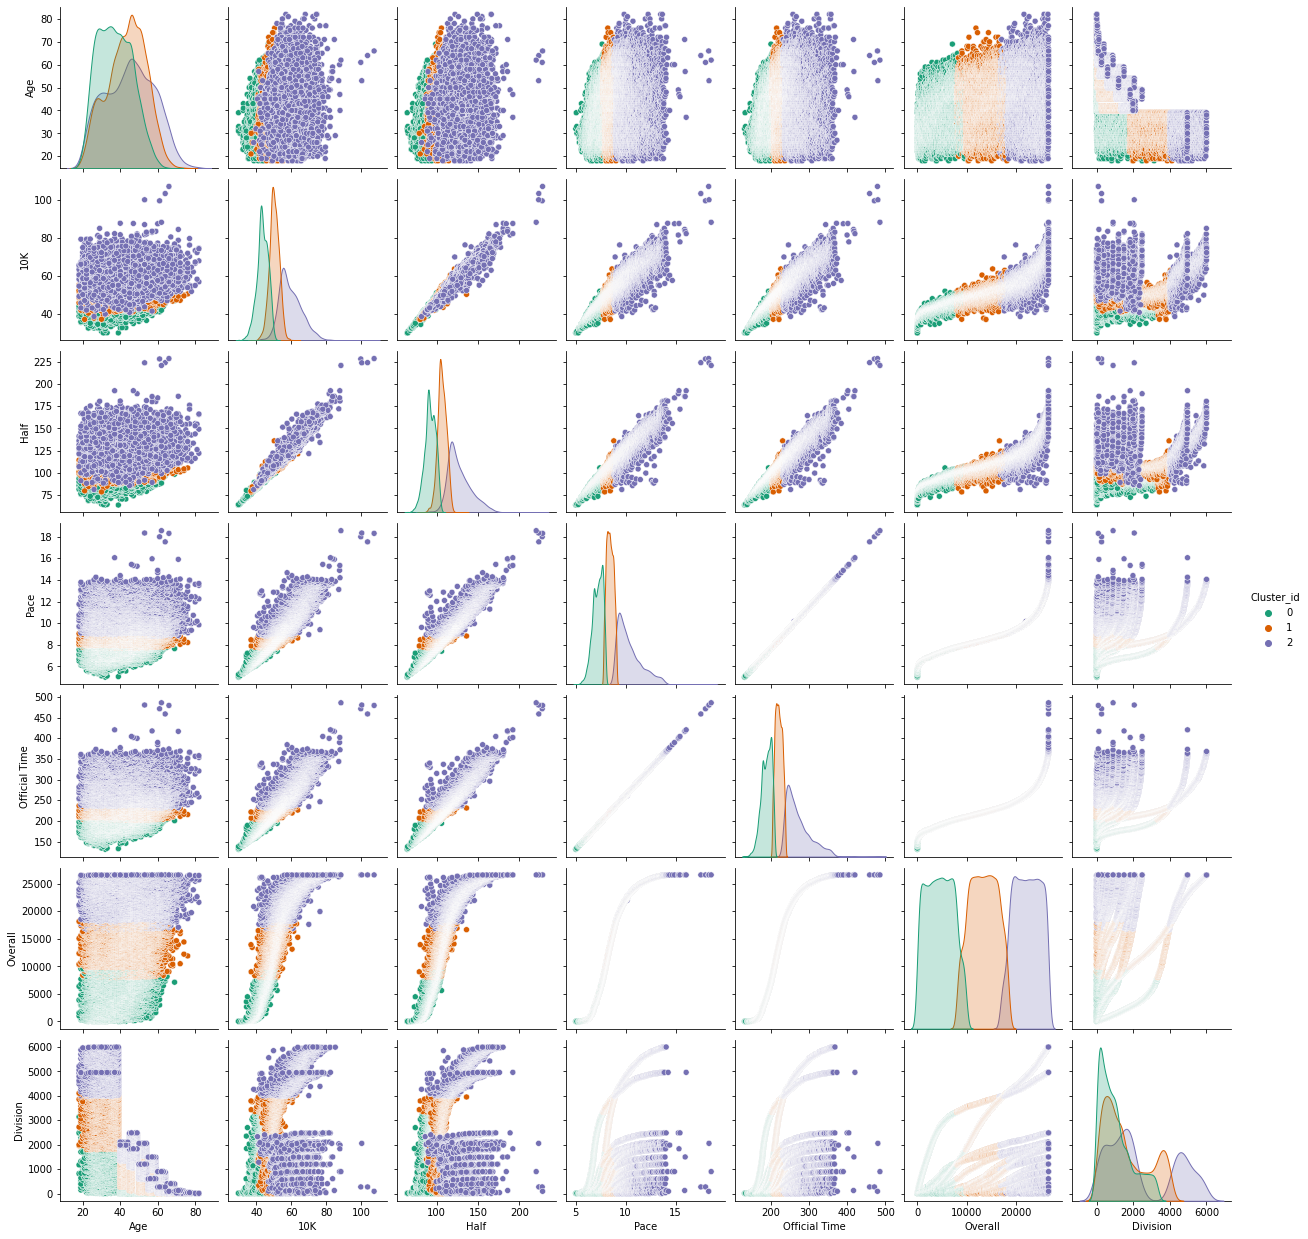

In [ ]:
df7 = df6.copy().drop(columns=['5K','10K','15K', '20K','25K','30K','35K','40K','M/F','Country','Gender','State']) # Drop unnecessary columns
df7['Cluster_id'] = y_kprototypes # Create Cluster_id column to visualize
sns.pairplot(df7, hue='Cluster_id', palette='Dark2', diag_kind='kde') # Plot pairplot, classifier base on Cluster_id column

> **Conclusion:** Based on graph above, we see: 
1. **Clusters** have a **clear distinction**.
2. Some **clusters** have more **members** than others.


### 4.4 Hierarchical clustering



#### 4.4.1 Dendrogram

In [ ]:
# Drop some unecessary columns
df8 = df2.drop(columns=['5K','10K','15K', '20K','25K','30K','35K','40K','M/F','Country','Gender','State','new_Age','Half','Pace','Division'])

In [ ]:
df8_norm = normalize(df8, norm='l2') # Normalize data

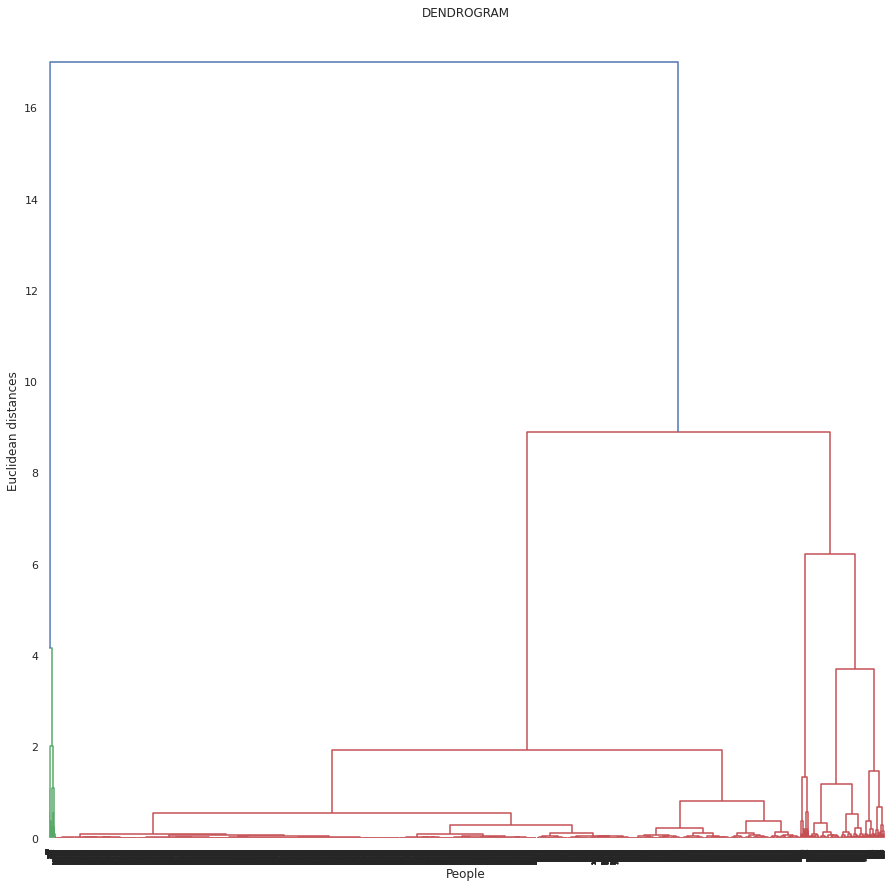

In [ ]:
plt.figure(figsize =(15, 15)) # Set size for figure
# Using the dendrogram to find the optimal number of clusters
Dendrogram = shc.dendrogram((shc.linkage(df8_norm, method ='ward'))) 
plt.title('DENDROGRAM') # Set title for figure
plt.xlabel('People') # Set label for x axis
plt.ylabel('Euclidean distances') # Set label for # axis
plt.show() # Plot all

> **Conclusion:** Based on graph above, we see: 
1. **Clusters** have a **clear distinction**.
2. Some **clusters** have more **members** than others.


#### 4.4.2 Agglomerative Clustering

In [ ]:
# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward') # Apply AgglomerativeCluster for model
y_hc = hc.fit_predict(df8_norm) # Fit model

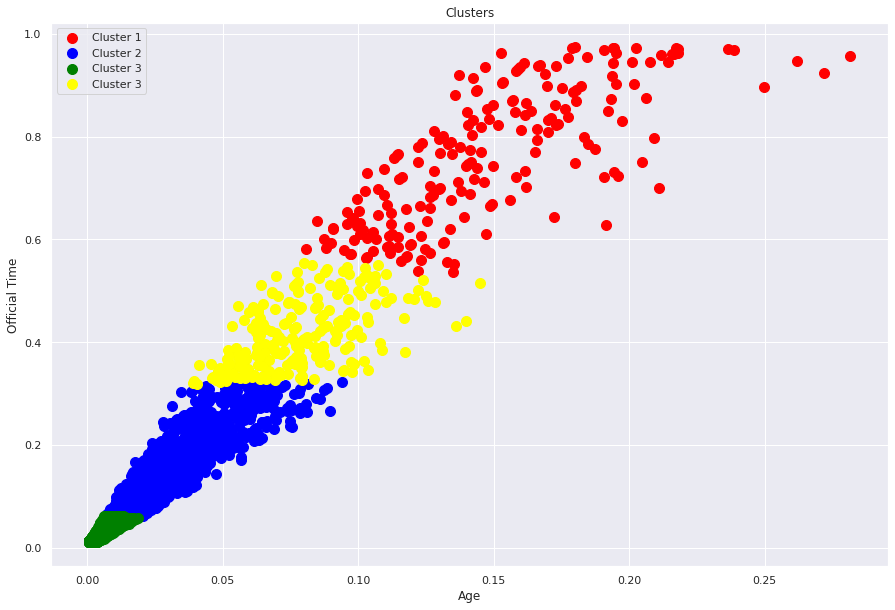

In [ ]:
# Visualising the clusters
plt.figure(figsize =(15, 10)) # Set size for figure
plt.scatter(df8_norm[y_hc == 0, 0], df8_norm[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1') # Plot scatter for cluster 1
plt.scatter(df8_norm[y_hc == 1, 0], df8_norm[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') # Plot scatter for cluster 2
plt.scatter(df8_norm[y_hc == 2, 0], df8_norm[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3') # Plot scatter for cluster 3
plt.scatter(df8_norm[y_hc == 3, 0], df8_norm[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Cluster 3') # Plot scatter for cluster 4
plt.title('Clusters') # Set title for figure
plt.xlabel('Age') # Set label for x axis
plt.ylabel('Official Time') # Set label for x axis
plt.legend()  # Set label for y axis
plt.show() # Plot all

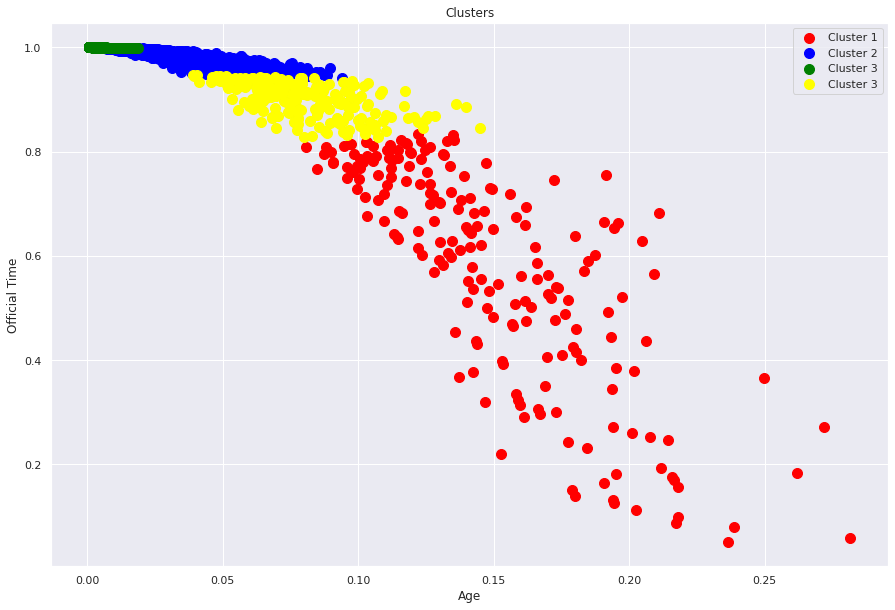

In [ ]:
# Visualising the clusters
plt.figure(figsize =(15, 10)) # Set size for figure
plt.scatter(df8_norm[y_hc == 0, 0], df8_norm[y_hc == 0, 2], s = 100, c = 'red', label = 'Cluster 1') # Plot scatter for cluster 1
plt.scatter(df8_norm[y_hc == 1, 0], df8_norm[y_hc == 1, 2], s = 100, c = 'blue', label = 'Cluster 2') # Plot scatter for cluster 2
plt.scatter(df8_norm[y_hc == 2, 0], df8_norm[y_hc == 2, 2], s = 100, c = 'green', label = 'Cluster 3') # Plot scatter for cluster 3
plt.scatter(df8_norm[y_hc == 3, 0], df8_norm[y_hc == 3, 2], s = 100, c = 'yellow', label = 'Cluster 3') # Plot scatter for cluster 4
plt.title('Clusters') # Set title for figure
plt.xlabel('Age') # Set label for x axis
plt.ylabel('Official Time') # Set label for x axis
plt.legend()  # Set label for y axis
plt.show() # Plot all

> **Conclusion:** Based on graph above, we see: 
1. **Clustering** results are pretty **good**.
2. There are **many outliers**.
